<h1 align=center><font size=5>SÉRGIO ALBUQUERQUE</font></h1>

<h1>Data Wrangling</h1>

<h3>Bem vindo!</h3>

Ao final deste notebook, você terá aprendido os fundamentos do Data Wrangling! 

<h2>Conteúdo</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identificando e lidando com a falta de valores (missing data)</a>
        <ul>
            <li><a href="#identify_missing_values">Identificando valores faltantes</a></li>
            <li><a href="#deal_missing_values">Lidando com valores faltantes</a></li>
            <li><a href="#correct_data_format">Corrigindo o formato dos dados</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Padronizando os dados</a></li>
    <li><a href="#data_normalization">Normalizando os dados (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Variável indicadora</a></li>
</ul>
    
</div>
 
<hr>

<h2>Qual é o propósito do Data Wrangling?</h2>

Data Wrangling é o processo de converter os dados do seu formato inicial para um formato mais adequado para a análise exploratória.

<h3>Qual é o consumo de combustível (L/100k) para um carro a diesel?</h3>

<h3>Importar os dados</h3>
<p>
Você pode encontrar o "Automobile Data Set" no seguinte link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
Este será o dataset usado pra fins didáticos neste curso.
</p>

<h4>Importar o pandas e o matplotlib</h4> 

**negrito**

In [4]:
Obserção


SyntaxError: ignored

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

<h2>Agora vamos ler o data set na URL fornecida e adicionar o cabeçalho à tabela.</h2>

URL do dataset

<h3>Vamos associá-la a um nome de variável que representará o DataSet</h3>

In [6]:
arquivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Agora vamos criar uma lista chamada <b>cabecalho</b> contendo os nomes das colunas 

In [7]:
cabecalho = ["codigo","perdas-normalizadas","fabricante","combustivel","aspiração", "portas","tipo",
         "direcao","tracao","rodas", "tamanho","comprimento","altura","massa","tipo-de-motor",
         "cilindros", "tam-motor","injecao","calibre","stroke","taxa-de-compressao","cavalos",
         "max-rpm","mpg-cidade","mpg-estrada","preco"]

Use o método <b>read_csv()</b> do Pandas para ler os dados do endereço na web (URL). Configure o parâmetro "names" igual ao da lista "cabecalho".

In [8]:
df = pd.read_csv(arquivo, names = cabecalho)

 Use o métido <b>head()</b> para mostrar as primeiras 5 linhas do dataframe. 

In [12]:
# Para vermos como o dataset se parece, vamos usar o método head() .
df.head(10)

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Como podemos ver, muitos pontos de interrogação apareceram no dataframe; eles representam valores faltantes (missing values) que podem impedir nossa análise. 
<div>Então, como identificaremos todos os valores faltantes e lidaremos com eles?</div> 


<b>Como trabalhar com dados faltantes?</b>

PAssos para trabalhar com dados faltantes:
<ol>
    <li>Identificar onde faltam dados</li>
    <li>Lidar com os dados faltantes</li>
    <li>Corrigir o formato dos dados</li>
</ol>

<h2 id="identify_handle_missing_values">Identificando e lidando com valores faltantes</h2>


<h3 id="identify_missing_values">Identificando valores faltantes</h3>
<h4>Vamos converter o caractere "?" para NaN, o identificador de campo vazio (Not a Number) do Python</h4>
No dataset de carros, os dados perdidos (faltantes) vieram com um ponto de interrogação "?".
Vamos substituir o "?" com NaN (Not a Number), que é o marcador padrão do Python para valores faltantes, por questões de velocidade computacional e conveniência. Vamos usar a seguinte função para isso: 
 <pre>.replace(A, B, inplace = True) </pre>
para substituir A por B

In [14]:
import numpy as np

# substituir "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Avaliando os dados faltantes</h4>

Os dados faltantes foram convertidos para o padrão do Python (Nan). Use as funções do Python para identificar estes dados perdidos. Existem dois métodos para identificar dados faltantes:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
A saída é um valor booleano indicando The output is a boolean value indicando se o valor que foi passado como argumento é de fato um dado faltante.

In [15]:
missing_data = df.isnull()
missing_data.head(10)

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


"True" indica um valor faltante, enquanto "False" indica que não é um valor faltante.

<h4>Vamos contar quantos valores faltantes existem em cada coluna</h4>
<p>
Usando um loop for em Python, podemos rapidamente saber o número de valores faltantes em cada coluna. Como mencionado anteriormente, "True" representa um valor faltante, e "False" representa um valor presente no DataSet. No corpo do loop for o método ".value_counts()"  contará o número de valores "True". 
</p>

In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

codigo
False    205
Name: codigo, dtype: int64

perdas-normalizadas
False    164
True      41
Name: perdas-normalizadas, dtype: int64

fabricante
False    205
Name: fabricante, dtype: int64

combustivel
False    205
Name: combustivel, dtype: int64

aspiração
False    205
Name: aspiração, dtype: int64

portas
False    203
True       2
Name: portas, dtype: int64

tipo
False    205
Name: tipo, dtype: int64

direcao
False    205
Name: direcao, dtype: int64

tracao
False    205
Name: tracao, dtype: int64

rodas
False    205
Name: rodas, dtype: int64

tamanho
False    205
Name: tamanho, dtype: int64

comprimento
False    205
Name: comprimento, dtype: int64

altura
False    205
Name: altura, dtype: int64

massa
False    205
Name: massa, dtype: int64

tipo-de-motor
False    205
Name: tipo-de-motor, dtype: int64

cilindros
False    205
Name: cilindros, dtype: int64

tam-motor
False    205
Name: tam-motor, dtype: int64

injecao
False    205
Name: injecao, dtype: int64

calibre
False    201
True 

BAseado no sumário acima, cada coluna tem 205 linhas de dados, sendo sete as colunas que possuem dados faltantes:
<ol>
    <li>"perdas-normalizadas": 41 missing data</li>
    <li>"portas": 2 missing data</li>
    <li>"massa": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"cavalos": 2 missing data</li>
    <li>"max-rpm": 2 missing data</li>
    <li>"preco": 4 missing data</li>
</ol>

<h3 id="deal_missing_values"Lidando com os dados faltantes</h3>
<b>Como lidar com os dados faltantes?</b>

<ol>
    <li>Apagar dados<br>
        a. Apagar uma linha<br>
        b. Apagar uma coluna
    </li>
    <li>Substituir os dados<br>
        a. Substituir pela média<br>
        b. Substituir pela frequência<br>
        c. Substituir baseado em outros critérios
    </li>
</ol>

Toda uma coluna deve ser apagada somente se a maioria dos dados na coluna estiver vazio, inviabilizando seu uso para a análise. No nosso dataset, nenhuma das colunas está tão vazia que justifique a sua exclusão.
Temos uma certa liberdade para escolher o método para substituir os dados, entretanto alguns métodos podem ser mais adequados do que outros.Vamos aplicar cada método em diferentes colunas para fins didáticos:

<b>Substituir pela média:</b>
<ul>
    <li>"perdas-normalizadas": 41 dados faltantes, substituir pela média</li>
    <li>"stroke": 4 dados faltantes, substituir pela média</li>
    <li>"massa": 4 dados faltantes, substituir pela média</li>
    <li>"cavalos": 2 dados faltantes, substituir pela média</li>
    <li>"max-rpm": 2 dados faltantes, substituir pela média</li> 
</ul>

<b>Substituir pela frequência:</b>
<ul>
    <li>"portas": 2 dados faltantes, substituir pelo valor "four" (valor com maior frequência na coluna).
        <ul>Motivo: 84% dos sedans têm quatro portas. Como quatro portas é o valor mais frequente, é o que tem a maior chance de ocorrer.</li>
        </ul>
    </li>
</ul>

<b>Apagar toda a coluna:</b>
<ul>
    <li>"preco": 4 dados faltantes, simplesmente apagaremos as linhas que não têm este dado
        <ul>
            <li>Razão: o preço é o a informação que queremos predizer. Nenhuma linha que não tenha o preço poderá ser usada para a predição, portanto nenhuma linha com o preço faltante nos será útil.</li>
        </ul>
    </li>
</ul>

<h4>Mãos na massa! Vamos calcular a média da coluna</h4>

In [19]:
media_perda_norm = df["perdas-normalizadas"].astype("float").mean(axis=0)
print("Média das perdas-normalizadas:", media_perda_norm)


Média das perdas-normalizadas: 122.0


<h4>Substituir "NaN" pelo valor da média da coluna "perdas-normalizadas"</h4>

In [20]:
df["perdas-normalizadas"].replace(np.nan, media_perda_norm, inplace=True)
df.head()

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Calcular o valor médio da coluna "massa"</h4>

In [21]:
media_massa=df['massa'].astype('float').mean(axis=0)
print("Massa média:", media_massa)

Massa média: 2555.5658536585365


<h4>Substituir NaN pela média</h4>

In [22]:
df["massa"].replace(np.nan, media_massa, inplace=True)
df.head()

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<div>
<b>Vamos substituir a coluna "pistoes" pela sua média.</b>
</div>

In [23]:
# Substituição da coluna pistoes pela média
media_stroke = df['stroke'].astype('float').mean(axis=0)
print("Stroke médio:", media_stroke)
df["stroke"].replace(np.nan, media_stroke, inplace=True)
df.head(10)

Stroke médio: 3.2554228855721337


,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h4>Vamos calcular o valor médio da coluna "cavalos":</h4>

In [24]:
media_cavalos = df['cavalos'].astype('float').mean(axis=0)
print("Média de cavalos de força:", media_cavalos)

Média de cavalos de força: 104.25615763546799


<h4>Agora vamos substituir "NaN" pelo valor médio:</h4>

In [25]:
df['cavalos'].replace(np.nan, media_cavalos, inplace=True)
df.head()

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Vamos calcular a média da coluna 'max-rpm':</h4>

In [26]:
media_max_rpm=df['max-rpm'].astype('float').mean(axis=0)
print("Média dos RPMs máximos:", media_max_rpm)

Média dos RPMs máximos: 5125.369458128079


<h4>Substituir os NaN pelo valor médio:</h4>

In [27]:
df['max-rpm'].replace(np.nan, media_max_rpm, inplace=True)
df['max-rpm'].head()

0    5000
1    5000
2    5000
3    5500
4    5500
Name: max-rpm, dtype: object

Para ver que valors estão presentes em uma coluna específica, nós podemos usar método ".value_counts()" :

In [28]:
df['portas'].value_counts()

four    114
two      89
Name: portas, dtype: int64

Nós podemos ver que "4 portas" é o valor mais comum nesta coluna. Além disso, não tem sentido fazer a média do número de portas de um veículo, pois não existem "3,5 portas". Podemos usar o método ".idxmax()" para calcular o valor mais comum para nós automaticamente:

In [29]:
df['portas'].value_counts().idxmax()

'four'

O procedimento de substituição é muito semelhante ao que vimos anteriormente.

In [30]:
#substituir os valores faltantes da coluna 'portas' pelo valor mais frequente
df["portas"].replace(np.nan, "four", inplace=True)
df["portas"].head()

0     two
1     two
2     two
3    four
4    four
Name: portas, dtype: object

Finalmente, vamos simplesmente apagar as todas as linhas do dataframe que não possuem preço definido.

In [31]:
# simplesmente apague todas as linhas com NaN na coluna "preco"
df.dropna(subset=["preco"], axis=0, inplace=True)

# vamos ressetar o índice da tabela, por que apagamos algumas linhas
df.reset_index(drop=True, inplace=True)

In [32]:
df.head()

,codigo,perdas-normalizadas,fabricante,combustivel,aspiração,portas,tipo,direcao,tracao,rodas,tamanho,comprimento,altura,massa,tipo-de-motor,cilindros,tam-motor,injecao,calibre,stroke,taxa-de-compressao,cavalos,max-rpm,mpg-cidade,mpg-estrada,preco
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Ótimo!</b> Agora temos um dataset sem valores faltantes!

<h3 id="correct_data_format">Corrigir o formato dos dados</h3>
<b>Estamos chegando lá!</b>
<p>O último passo da limpeza de dados é verificar e ter certeza de que todos os dados estão no seu formato correto (int, float, string ou outro).</p>

No Pandas, usaremos:
<p><b>.dtype()</b> para verificar o tipo de dado</p>
<p><b>.astype()</b> para mudar o tipo de dado</p>

<h4>Vamos listar o tipo de dados por coluna</h4>

In [33]:
df.dtypes

codigo                   int64
perdas-normalizadas     object
fabricante              object
combustivel             object
aspiração               object
portas                  object
tipo                    object
direcao                 object
tracao                  object
rodas                  float64
tamanho                float64
comprimento            float64
altura                 float64
massa                    int64
tipo-de-motor           object
cilindros               object
tam-motor                int64
injecao                 object
calibre                 object
stroke                  object
taxa-de-compressao     float64
cavalos                 object
max-rpm                 object
mpg-cidade               int64
mpg-estrada              int64
preco                   object
dtype: object

<p>Como podemos ver acima, algumas colunas não têm um tipo de dados que corresponde à informação armazenada. Variáveis numéricas deveriam ser do tipo 'float' ou 'int', e variáveis categóricas, que contêm strings, deveriam ser do tipo  'object'. Por exemplo, as variáveis 'massa' e 'pistoes' são numéricas, portanto esperamos que sejam do tipo 'float' ou 'int'; entretanto, são do tipo 'object'. Precisaremos converter os tipos de dados para um formato apropriado usando o método "astype()".</p> 

<h4>Convertendo dados para o formato apropriado</h4>

In [34]:
df[["massa", "stroke"]] = df[["massa", "stroke"]].astype("float")
df[["perdas-normalizadas"]] = df[["perdas-normalizadas"]].astype("int")
df[["preco"]] = df[["preco"]].astype("float")
df[["max-rpm"]] = df[["max-rpm"]].astype("float")

<h4>Vamos ver como ficaram estas colunas depois da conversão?</h4>

In [35]:
df.dtypes

codigo                   int64
perdas-normalizadas      int64
fabricante              object
combustivel             object
aspiração               object
portas                  object
tipo                    object
direcao                 object
tracao                  object
rodas                  float64
tamanho                float64
comprimento            float64
altura                 float64
massa                  float64
tipo-de-motor           object
cilindros               object
tam-motor                int64
injecao                 object
calibre                 object
stroke                 float64
taxa-de-compressao     float64
cavalos                 object
max-rpm                float64
mpg-cidade               int64
mpg-estrada              int64
preco                  float64
dtype: object

<b>Maravilhoso!</b>

Finalmente obtivemos um dataset limpo e livre de dados faltantes, com todas as colunas no formato mais adequado para a análise exploratória!

<h2 id="binning">Separando dados categóricos em intervalos</h2>
<p>
    "Binning" é o processo de transformar variáveis numéricas contínuas em intervalos categóricos discretos ("bins"), para agrupamento e análise.
</p>

<b>Exemplo: </b>
<p>No nosso dataset, "cavalos" é uma variável real com valores na faixa de 48 a 288, com 57 valores únicos. Se estamos preocupados apenas com os preços dos carros com número de cavalos de força altos (high), médio (medium) e pequeno (little), podemos rearranjar os dados em 3 intervalos categóricos para simplificar a análise. </p>

<p>Nós vamos usar o método 'cut' do Pandas para segmentar a coluna "cavalos" em 3 intervalos.</p>



 Primeiro vamos converter os dados para o tipo adequado


In [36]:
df["cavalos"]=df["cavalos"].astype(int, copy=True)

Agora vamos plotar um histograma da coluna "cavalos", para vermos como se apresenta a distribuição dos dados.

Text(0.5, 1.0, 'Potência (Cavalos)')

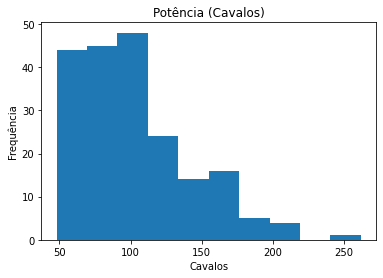

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["cavalos"])

# set x/y labels and plot title
plt.pyplot.xlabel("Cavalos")
plt.pyplot.ylabel("Frequência")
plt.pyplot.title("Potência (Cavalos)")

<p>Podemos querer 3 intervalos de tamanhos semelhantes, então vamos usar o a função <code>linspace(valor_inicial, valor_final, numeros_gerados)</code> do Numpy.</p>
<p>Como queremos que o valor mínimo de cavalos de força seja incluído, vamos configurar o parâmetro valor_inicial=min(df["cavalos"]).</p>
<p>Como queremos que seja incluído o máximo d cavalos de força, vamos atribuir o parâmetro valor_final=max(df["cavalos"]).</p>
<p>Como queremos criar 3 intervalos de tamanho igual, são 4 divisores no total, então numeros_gerados=4.</p>

In [39]:
bins = np.linspace(min(df["cavalos"]), max(df["cavalos"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Vamos então criar os nomes dos grupos:

In [41]:
group_names = ['Baixa', 'Média', 'Alta']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

In [45]:
df['cavalos-binned'] = pd.cut(df['cavalos'], bins, labels=group_names, include_lowest=True )
df[['cavalos','cavalos-binned']].head(50)

,cavalos,cavalos-binned
0,111,Baixa
1,111,Baixa
2,154,Média
3,102,Baixa
4,115,Baixa
5,110,Baixa
6,110,Baixa
7,110,Baixa
8,140,Média
9,101,Baixa


Vamos ver o número de veículos em cada intervalo.

In [46]:
df["cavalos-binned"].value_counts()

Baixa    153
Média     43
Alta       5
Name: cavalos-binned, dtype: int64

Vamos plotar a distribuição de cada intervalo.

Text(0.5, 1.0, 'Cavalos Categorizado')

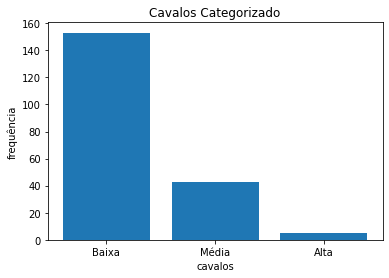

In [47]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["cavalos-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("cavalos")
plt.pyplot.ylabel("frequência")
plt.pyplot.title("Cavalos Categorizado")